In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sc
import seaborn as sns

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ada xg boost .ipynb',
 'admission solution.ipynb',
 'admission.csv',
 'bank decision tree.ipynb',
 'bank.xlsx',
 'bank_final1.xlsx',
 'boosting ensemble technique.ipynb',
 'Decision Tree + Random Forest + Ensemble Techniques_Class Assessment.pdf',
 'HeartDisease.csv',
 'imp_feature.csv',
 'Problem Statement_RandomForest.pdf',
 'taxi fare prediction.ipynb',
 'Taxicab_data.ipynb',
 'TaxiFare.csv',
 'Treebased_algo.ipynb']

In [3]:
taxi=pd.read_csv(r'TaxiFare.csv')

In [4]:
taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxi.info() #take a brief look at dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
taxi.isnull().sum().sort_values(ascending=False) #checking the null values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
# taxi["amount"].value_counts()

*_In this data set there are not any null values but there are some records that contain zeros and negative values_*

In [12]:
taxi["no_of_passenger"].value_counts(dropna=False)

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

##### conducting investigation for outliers 

In [13]:
taxi.describe(percentiles=[.01,.015,.02,.025,.03,.035,.05,.1,.2,.25,.4,.5,.7,.8,.9,.95,.97,.99]).T

,count,mean,std,min,1%,1.5%,2%,2.5%,3%,3.5%,...,25%,40%,50%,70%,80%,90%,95%,97%,99%,max
amount,50000.0,11.364171,9.685557,-5.000000,3.300000,3.300000,3.500000,3.700000,3.700000,4.000000,...,6.000000,7.300000,8.500000,11.500000,14.100000,20.500000,30.500000,38.330000,52.000000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-74.014444,-74.012033,-74.010458,-74.009572,-74.008735,-74.008210,...,-73.992062,-73.985838,-73.981840,-73.971327,-73.962090,-73.950992,-73.871328,-73.786866,0.000000,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,0.000000,0.000000,40.580091,40.644636,40.645435,40.648665,...,40.734880,40.746850,40.752678,40.764020,40.771054,40.779783,40.787807,40.794364,40.807126,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-74.015120,-74.013753,-74.011755,-74.010565,-74.009843,-74.009049,...,-73.991152,-73.984217,-73.980082,-73.968778,-73.958434,-73.944730,-73.873277,-73.801484,0.000000,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,0.000000,0.000000,40.564511,40.642556,40.646878,40.662347,...,40.734371,40.747607,40.753372,40.764448,40.772572,40.782902,40.794087,40.804070,40.832502,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,5.000000,5.000000,6.000000,6.000000


**_here in this dataset i observe that in NYC legally  the highest no. of passenger that  taxi can have is about 4 at max
but in some records there more than 4 so i have consider them as an outlier by assuming the extrem or any urgent cases_**.

In [14]:
# taxi[["amount","no_of_passenger"]].corr()

In [15]:
taxi[taxi["no_of_passenger"]>=6]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
38,42:00.0,9.0,2013-11-24 11:42:00 UTC,-73.957740,40.773617,-73.977087,40.758465,6
60,57:00.0,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6
63,12:00.0,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6
67,28:00.0,16.5,2014-04-29 18:28:00 UTC,-73.970323,40.750840,-73.998392,40.724862,6
68,19:05.0,11.5,2015-04-12 10:19:05 UTC,-73.979279,40.723438,-74.004608,40.746948,6
...,...,...,...,...,...,...,...,...
49734,15:00.0,49.8,2012-02-02 15:15:00 UTC,-73.777215,40.646497,-73.989640,40.757087,6
49737,55:00.0,4.9,2012-04-19 01:55:00 UTC,-73.972423,40.763305,-73.961630,40.771857,6
49789,31:00.0,15.3,2011-12-06 17:31:00 UTC,-73.974067,40.757647,-74.006312,40.732947,6
49829,25:00.0,4.5,2013-09-17 12:25:00 UTC,-74.008127,40.737882,-74.007775,40.741977,6


In [16]:

# here i cap the outliers that are in no. of passengers

taxi["no_of_passenger"]=np.where(taxi["no_of_passenger"]>4,4,taxi['no_of_passenger'])

In [17]:
taxi.describe(percentiles=[.01,.015,.02,.025,.03,.035,.05,.1,.2,.25,.4,.5,.7,.8,.9,.95,.97,.99]).T

,count,mean,std,min,1%,1.5%,2%,2.5%,3%,3.5%,...,25%,40%,50%,70%,80%,90%,95%,97%,99%,max
amount,50000.0,11.364171,9.685557,-5.000000,3.300000,3.300000,3.500000,3.700000,3.700000,4.000000,...,6.000000,7.300000,8.500000,11.500000,14.100000,20.500000,30.500000,38.330000,52.000000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-74.014444,-74.012033,-74.010458,-74.009572,-74.008735,-74.008210,...,-73.992062,-73.985838,-73.981840,-73.971327,-73.962090,-73.950992,-73.871328,-73.786866,0.000000,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,0.000000,0.000000,40.580091,40.644636,40.645435,40.648665,...,40.734880,40.746850,40.752678,40.764020,40.771054,40.779783,40.787807,40.794364,40.807126,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-74.015120,-74.013753,-74.011755,-74.010565,-74.009843,-74.009049,...,-73.991152,-73.984217,-73.980082,-73.968778,-73.958434,-73.944730,-73.873277,-73.801484,0.000000,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,0.000000,0.000000,40.564511,40.642556,40.646878,40.662347,...,40.734371,40.747607,40.753372,40.764448,40.772572,40.782902,40.794087,40.804070,40.832502,43.415190
no_of_passenger,50000.0,1.559220,0.997694,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**Geographical cordinates of Newyork is:{40.7128° N, 74.0060° W}
any cordinates out of the above range are consider as outside from the city and treated as an outliers**

In [18]:
#lock the lattitude and longnitude of pick up and dropoff according to the city cordinates
# Remove latitude and longtiude outliers
taxi =taxi.loc[taxi['latitude_of_pickup'].between(40, 42)]
taxi =taxi.loc[taxi['longitude_of_pickup'].between(-75, -72)]
taxi =taxi.loc[taxi['latitude_of_dropoff'].between(40, 42)]
taxi =taxi.loc[taxi['longitude_of_dropoff'].between(-75, -72)]
print(f'New number of observations: {taxi.shape[0]}')


New number of observations: 48953


In [19]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)


In [20]:
taxi['Distance_Travel_manh'] = minkowski_distance(taxi['longitude_of_pickup'], 
                                       taxi['longitude_of_dropoff'],
                                       taxi['latitude_of_pickup'],
                                       taxi['latitude_of_dropoff'], 1)
# calculating distance using mannhatten distance


In [21]:
taxi['x1']=taxi["latitude_of_pickup"]
taxi["x2"]=taxi["latitude_of_dropoff"]
taxi['y1']=taxi["longitude_of_pickup"]
taxi['y2']=taxi["longitude_of_dropoff"]

In [22]:
taxi["Distance_Travel"] = np.sqrt((np.square(taxi["x1"]-taxi["x2"]))+(np.square(taxi["y1"]-taxi["y2"])))


In [23]:
 taxi["date_time_of_pickup"]=pd.to_datetime(taxi['date_time_of_pickup'])
#here we are changing the datetype of date_time_of_pickup from object to datetime


In [24]:
taxi['pickup_day']=taxi['date_time_of_pickup'].dt.day_name()
# adding new variable of pickup_day
taxi['pickup_day_no']=taxi['date_time_of_pickup'].dt.weekday # adding new variable of pickup_day_no
taxi['pickup_hour']=taxi['date_time_of_pickup'].dt.hour # adding new variable of pickup_hour



In [25]:
taxi["pickup_month"]=taxi["date_time_of_pickup"].dt.month 
taxi['year']=taxi["date_time_of_pickup"].dt.year
# adding new variable of pickup_month
taxi["date"]=taxi["date_time_of_pickup"].dt.date


In [26]:

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
    
# here we are making a function for time of day pickups.
taxi["pickup_time_of_day"]=taxi["pickup_hour"].apply(time_of_day) # applying new funtion here.

    



In [27]:
taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance_Travel_manh,x1,...,y1,y2,Distance_Travel,pickup_day,pickup_day_no,pickup_hour,pickup_month,year,date,pickup_time_of_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,40.721319,...,-73.844311,-73.841610,0.009436,Monday,0,17,6,2009,2009-06-15,Evening
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,40.711303,...,-74.016048,-73.979268,0.079696,Tuesday,1,16,1,2010,2010-01-05,Evening
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,40.761270,...,-73.982738,-73.991242,0.013674,Thursday,3,0,8,2011,2011-08-18,Late night
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,40.733143,...,-73.987130,-73.991567,0.025340,Saturday,5,4,4,2012,2012-04-21,Late night
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,40.768008,...,-73.968095,-73.956655,0.019470,Tuesday,1,7,3,2010,2010-03-09,Morning


In [28]:
taxi1=taxi.drop(taxi[taxi['amount']<2.5].index)
#droping of the record in which tax charge the amount less than 2.5 cause it is unusual and will be treated as an outliers


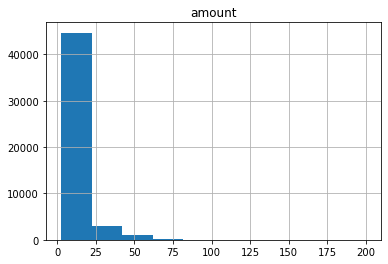

In [29]:
taxi1.hist(column='amount')
tax_amt=taxi1[['amount']]

In [30]:
taxi1["amount"]=np.where(taxi1['amount']>52,52,taxi1['amount'])

In [31]:
# def outlier_capping(x):
#     x = x.clip(upper=x.quantile(0.99))data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYQAAAEICAYAAABfz4NwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAU/0lEQVR4nO3df6zd9X3f8ecrOKEUBwMh9SxMYjK8agS0JPaALSOzBxpuwmK6kc0ZDaZjshaRKVEbCbNMW7rJmtnUImU0VO5MMZD24tJGoCC0IIIXNeLHcAoYQygmONTg2iFAgvODFvLeH+dz2fHl/jj32veeL/j5kI7O9/v+/jjv7/ccn9f9fr/nHKeqkCTpbcNuQJLUDQaCJAkwECRJjYEgSQIMBElSYyBIkgADQZLUGAhShyVZkqSSzBt2L3rrMxAkSYCBoCNckvVJnkrycpLHkvxqq1+W5FtJrknyUpLvJvmHrf6XSfYnWdu3ngVJbkzy/STfS/Ifk7ytTftikpv75j3or/4k25L81/Z4Lyf5epKT2uzfbPcvJTmQ5B/MzZ7RkchA0JHuKeBcYAHwW8DNSRa1aWcDjwDvAv4QGAH+PnAa8GvAtUnmt3n/Z1vH+4B/DFwK/Po0+vjXbf5fAt4BfL7VP9Luj6+q+VV173Q3UBqUgaAjWlX9cVU9V1U/r6pbgCeBs9rkp6vqD6rqNeAW4BTgv1TVK1X1deCvgdOSHAX8K+Cqqnq5qnYDvw18ahqt/EFV/UVV/RTYCnzgsGygNA0Ggo5oSS5N8lA7LfQScAYwerpmX9+sPwWoqrG1+W3+dwDf65v2PeDkabTyV33DP2nrleaUgaAjVpL3Ar8PfAZ4V1UdDzwKZJqreh74G+C9fbX3AM+24R8Dv9g37W9NY93+HLHmjIGgI9mx9N5wvw+Q5NfpHSFMSzultBXYkOSdLWh+Axi9kPwQ8JEk70myALhqGqv/PvBzetcmpFllIOiIVVWP0TvXfy+900NnAt+a4er+Pb0jge8Cf0bvIvT17XHuoncN4hFgO/C1afT4E2AD8K12WuucGfYnTSn+BzmSJPAIQZLUGAiSJMBAkCQ1BoIkCYA37S8onnTSSbVkyZKB5v3xj3/MscceO7sNzVBXe+tqX2BvM9HVvqC7vXW1Lzi03rZv3/58Vb173IlV9aa8LVu2rAZ1zz33DDzvXOtqb13tq8reZqKrfVV1t7eu9lV1aL0BD9YE76ueMpIkAV5DkCQ1BoIkCTAQJEmNgSBJAgwESVJjIEiSAANBktQYCJIk4E380xWHYsn6O4b22Ls3fmxojy1Jk/EIQZIEGAiSpMZAkCQBBoIkqTEQJEmAgSBJagwESRJgIEiSGgNBkgQYCJKkxkCQJAEGgiSpMRAkSYCBIElqDARJEmAgSJIaA0GSBEwjEJIcleTPk3ytjZ+Y5K4kT7b7E/rmvSrJriRPJLmgr74syY427UtJ0upHJ7ml1e9PsuQwbqMkaQDTOUL4LPB43/h64O6qWgrc3cZJcjqwBng/sAr4cpKj2jLXAeuApe22qtUvB16sqtOAa4CrZ7Q1kqQZGygQkiwGPgb8r77yamBLG94CXNRXH6mqV6rqaWAXcFaSRcBxVXVvVRVw45hlRtd1K3De6NGDJGlupPfePMVMya3AfwPeCXy+qi5M8lJVHd83z4tVdUKSa4H7qurmVt8M3AnsBjZW1fmtfi5wZVvXo8CqqtrTpj0FnF1Vz4/pYx29IwwWLly4bGRkZKCNPHDgAPPnz399fMezPxxoudlw5skLDhof21tXdLUvsLeZ6Gpf0N3eutoXHFpvK1eu3F5Vy8ebNm+qhZNcCOyvqu1JVgzweOP9ZV+T1Cdb5uBC1SZgE8Dy5ctrxYpB2oFt27bRP+9l6+8YaLnZsPuSFQeNj+2tK7raF9jbTHS1L+hub13tC2avtykDAfgw8PEkHwV+ATguyc3AviSLqmpvOx20v82/Bzilb/nFwHOtvnicev8ye5LMAxYAL8xwmyRJMzDlNYSquqqqFlfVEnoXi79RVb8G3A6sbbOtBW5rw7cDa9onh06ld/H4garaC7yc5Jx2feDSMcuMruvi9hhTn8uSJB02gxwhTGQjsDXJ5cAzwCcAqmpnkq3AY8CrwBVV9Vpb5tPADcAx9K4r3Nnqm4Gbkuyid2Sw5hD6kiTNwLQCoaq2Adva8A+A8yaYbwOwYZz6g8AZ49R/RgsUSdJw+E1lSRJgIEiSGgNBkgQYCJKkxkCQJAEGgiSpMRAkSYCBIElqDARJEmAgSJIaA0GSBBgIkqTGQJAkAQaCJKkxECRJgIEgSWoMBEkSYCBIkhoDQZIEGAiSpMZAkCQBBoIkqTEQJEmAgSBJagwESRJgIEiSGgNBkgQYCJKkxkCQJAEGgiSpMRAkSYCBIElqDARJEmAgSJIaA0GSBBgIkqTGQJAkAQaCJKmZMhCS/EKSB5I8nGRnkt9q9ROT3JXkyXZ/Qt8yVyXZleSJJBf01Zcl2dGmfSlJWv3oJLe0+v1JlszCtkqSJjHIEcIrwD+pqr8HfABYleQcYD1wd1UtBe5u4yQ5HVgDvB9YBXw5yVFtXdcB64Cl7baq1S8HXqyq04BrgKsPfdMkSdMxZSBUz4E2+vZ2K2A1sKXVtwAXteHVwEhVvVJVTwO7gLOSLAKOq6p7q6qAG8csM7quW4HzRo8eJElzI7335ilm6v2Fvx04DfjdqroyyUtVdXzfPC9W1QlJrgXuq6qbW30zcCewG9hYVee3+rnAlVV1YZJHgVVVtadNewo4u6qeH9PHOnpHGCxcuHDZyMjIQBt54MAB5s+f//r4jmd/ONBys+HMkxccND62t67oal9gbzPR1b6gu711tS84tN5Wrly5vaqWjzdt3iArqKrXgA8kOR74apIzJpl9vL/sa5L6ZMuM7WMTsAlg+fLltWLFikna+P+2bdtG/7yXrb9joOVmw+5LVhw0Pra3ruhqX2BvM9HVvqC7vXW1L5i93qb1KaOqegnYRu/c/752Goh2v7/Ntgc4pW+xxcBzrb54nPpByySZBywAXphOb5KkQzPIp4ze3Y4MSHIMcD7wHeB2YG2bbS1wWxu+HVjTPjl0Kr2Lxw9U1V7g5STntOsDl45ZZnRdFwPfqEHOZUmSDptBThktAra06whvA7ZW1deS3AtsTXI58AzwCYCq2plkK/AY8CpwRTvlBPBp4AbgGHrXFe5s9c3ATUl20TsyWHM4Nk6SNLgpA6GqHgE+OE79B8B5EyyzAdgwTv1B4A3XH6rqZ7RAkSQNh99UliQBBoIkqTEQJEmAgSBJagwESRJgIEiSGgNBkgQYCJKkxkCQJAEGgiSpMRAkSYCBIElqDARJEmAgSJIaA0GSBBgIkqTGQJAkAQaCJKkxECRJgIEgSWoMBEkSYCBIkhoDQZIEGAiSpMZAkCQBBoIkqTEQJEmAgSBJagwESRJgIEiSGgNBkgQYCJKkxkCQJAEGgiSpMRAkSYCBIElqDARJEjBAICQ5Jck9SR5PsjPJZ1v9xCR3JXmy3Z/Qt8xVSXYleSLJBX31ZUl2tGlfSpJWPzrJLa1+f5Ils7CtkqRJDHKE8Crwm1X1d4FzgCuSnA6sB+6uqqXA3W2cNm0N8H5gFfDlJEe1dV0HrAOWttuqVr8ceLGqTgOuAa4+DNsmSZqGKQOhqvZW1bfb8MvA48DJwGpgS5ttC3BRG14NjFTVK1X1NLALOCvJIuC4qrq3qgq4ccwyo+u6FThv9OhBkjQ30ntvHnDm3qmcbwJnAM9U1fF9016sqhOSXAvcV1U3t/pm4E5gN7Cxqs5v9XOBK6vqwiSPAquqak+b9hRwdlU9P+bx19E7wmDhwoXLRkZGBur7wIEDzJ8///XxHc/+cOBtPtzOPHnBQeNje+uKrvYF9jYTXe0LuttbV/uCQ+tt5cqV26tq+XjT5g26kiTzgT8BPldVP5rkD/jxJtQk9cmWObhQtQnYBLB8+fJasWLFFF33bNu2jf55L1t/x0DLzYbdl6w4aHxsb13R1b7A3maiq31Bd3vral8we70N9CmjJG+nFwZfqao/beV97TQQ7X5/q+8BTulbfDHwXKsvHqd+0DJJ5gELgBemuzGSpJkb5FNGATYDj1fV7/RNuh1Y24bXArf11de0Tw6dSu/i8QNVtRd4Ock5bZ2XjllmdF0XA9+o6ZzLkiQdskFOGX0Y+BSwI8lDrfYfgI3A1iSXA88AnwCoqp1JtgKP0fuE0hVV9Vpb7tPADcAx9K4r3Nnqm4Gbkuyid2Sw5tA2S5I0XVMGQlX9GeOf4wc4b4JlNgAbxqk/SO+C9Nj6z2iBIkkaDr+pLEkCDARJUmMgSJIAA0GS1BgIkiTAQJAkNQaCJAkwECRJjYEgSQIMBElSYyBIkgADQZLUGAiSJMBAkCQ1BoIkCTAQJEmNgSBJAgwESVJjIEiSAANBktQYCJIkwECQJDUGgiQJMBAkSY2BIEkCDARJUmMgSJIAA0GS1BgIkiTAQJAkNQaCJAkwECRJjYEgSQIMBElSYyBIkgADQZLUGAiSJGCAQEhyfZL9SR7tq52Y5K4kT7b7E/qmXZVkV5InklzQV1+WZEeb9qUkafWjk9zS6vcnWXKYt1GSNIBBjhBuAFaNqa0H7q6qpcDdbZwkpwNrgPe3Zb6c5Ki2zHXAOmBpu42u83Lgxao6DbgGuHqmGyNJmrkpA6Gqvgm8MKa8GtjShrcAF/XVR6rqlap6GtgFnJVkEXBcVd1bVQXcOGaZ0XXdCpw3evQgSZo76b0/TzFT7zTO16rqjDb+UlUd3zf9xao6Icm1wH1VdXOrbwbuBHYDG6vq/FY/F7iyqi5sp6JWVdWeNu0p4Oyqen6cPtbRO8pg4cKFy0ZGRgbayAMHDjB//vzXx3c8+8OBlpsNZ5684KDxsb11RVf7Anubia72Bd3trat9waH1tnLlyu1VtXy8afMOqas3Gu8v+5qkPtkybyxWbQI2ASxfvrxWrFgxUFPbtm2jf97L1t8x0HKzYfclKw4aH9tbV3S1L7C3mehqX9Dd3rraF8xebzP9lNG+dhqIdr+/1fcAp/TNtxh4rtUXj1M/aJkk84AFvPEUlSRpls00EG4H1rbhtcBtffU17ZNDp9K7ePxAVe0FXk5yTrs+cOmYZUbXdTHwjRrkPJYk6bCa8pRRkj8CVgAnJdkD/GdgI7A1yeXAM8AnAKpqZ5KtwGPAq8AVVfVaW9Wn6X1i6Rh61xXubPXNwE1JdtE7MlhzWLZMkjQtUwZCVX1ygknnTTD/BmDDOPUHgTPGqf+MFiiSpOHxm8qSJMBAkCQ1BoIkCTAQJEmNgSBJAgwESVJjIEiSAANBktQYCJIkwECQJDUGgiQJMBAkSY2BIEkCDARJUmMgSJIAA0GS1BgIkiTAQJAkNQaCJAkwECRJjYEgSQIMBElSYyBIkgADQZLUGAiSJMBAkCQ1BoIkCYB5w27gSLNk/R0Hjf/mma9y2ZjabNi98WOz/hiS3tw8QpAkAQaCJKkxECRJgIEgSWoMBEkSYCBIkhoDQZIEGAiSpMYvph0hxn4hbiqH8wtzfilOenPwCEGSBHQoEJKsSvJEkl1J1g+7H0k60nQiEJIcBfwu8CvA6cAnk5w+3K4k6cjSlWsIZwG7quq7AElGgNXAY0PtSofFdK9fTGXQ6xteu5CmJ1U17B5IcjGwqqr+bRv/FHB2VX1mzHzrgHVt9JeBJwZ8iJOA5w9Tu4dbV3vral9gbzPR1b6gu711tS84tN7eW1XvHm9CV44QMk7tDUlVVZuATdNeefJgVS2fSWOzrau9dbUvsLeZ6Gpf0N3eutoXzF5vnbiGAOwBTukbXww8N6ReJOmI1JVA+L/A0iSnJnkHsAa4fcg9SdIRpROnjKrq1SSfAf43cBRwfVXtPIwPMe3TTHOoq711tS+wt5noal/Q3d662hfMUm+duKgsSRq+rpwykiQNmYEgSQKOgEDoyk9iJDklyT1JHk+yM8lnW/2LSZ5N8lC7fXRI/e1OsqP18GCrnZjkriRPtvsT5rinX+7bLw8l+VGSzw1rnyW5Psn+JI/21SbcR0muaq+7J5JcMITe/keS7yR5JMlXkxzf6kuS/LRv//3eHPc14fPXgX12S19fu5M81Opzuc8meq+Y/ddaVb1lb/QuUD8FvA94B/AwcPqQelkEfKgNvxP4C3o/0/FF4PMd2Fe7gZPG1P47sL4NrweuHvJz+VfAe4e1z4CPAB8CHp1qH7Xn9mHgaODU9jo8ao57+6fAvDZ8dV9vS/rnG8I+G/f568I+GzP9t4H/NIR9NtF7xay/1t7qRwiv/yRGVf01MPqTGHOuqvZW1bfb8MvA48DJw+hlGlYDW9rwFuCi4bXCecBTVfW9YTVQVd8EXhhTnmgfrQZGquqVqnoa2EXv9ThnvVXV16vq1TZ6H73v98ypCfbZRIa+z0YlCfAvgT+arcefyCTvFbP+WnurB8LJwF/2je+hA2/CSZYAHwTub6XPtMP66+f6tEyfAr6eZHv7iRCAhVW1F3ovUuCXhtQb9L6b0v+Pswv7DCbeR1177f0b4M6+8VOT/HmS/5Pk3CH0M97z16V9di6wr6qe7KvN+T4b814x66+1t3ogDPSTGHMpyXzgT4DPVdWPgOuAvw18ANhL7zB1GD5cVR+i94uzVyT5yJD6eIP2ZcWPA3/cSl3ZZ5PpzGsvyReAV4GvtNJe4D1V9UHgN4A/THLcHLY00fPXmX0GfJKD/wCZ8302znvFhLOOU5vRfnurB0KnfhIjydvpPcFfqao/BaiqfVX1WlX9HPh9ZvEQeTJV9Vy73w98tfWxL8mi1vsiYP8weqMXUt+uqn2tx07ss2aifdSJ116StcCFwCXVTji3Uws/aMPb6Z1z/jtz1dMkz19X9tk84J8Dt4zW5nqfjfdewRy81t7qgdCZn8Ro5yQ3A49X1e/01Rf1zfarwKNjl52D3o5N8s7RYXoXIx+lt6/WttnWArfNdW/NQX+tdWGf9ZloH90OrElydJJTgaXAA3PZWJJVwJXAx6vqJ331d6f3f5CQ5H2tt+/OYV8TPX9D32fN+cB3qmrPaGEu99lE7xXMxWttLq6aD/MGfJTeVfqngC8MsY9/RO8w7hHgoXb7KHATsKPVbwcWDaG399H7lMLDwM7R/QS8C7gbeLLdnziE3n4R+AGwoK82lH1GL5T2An9D76+yyyfbR8AX2uvuCeBXhtDbLnrnlkdfb7/X5v0X7Xl+GPg28M/muK8Jn79h77NWvwH4d2Pmnct9NtF7xay/1vzpCkkS8NY/ZSRJGpCBIEkCDARJUmMgSJIAA0GS1BgIkiTAQJAkNf8PprfzJZk/B8IAAAAASUVORK5CYII=
#     x = x.clip(lower=x.quantile(0.01))
#     return x
# bank_num=bank[[]].apply(lambda x: outlier_capping(x))

In [32]:
taxi1.describe(percentiles=[.01,.015,.02,.025,.03,.035,.05,.1,.2,.25,.4,.5,.7,.8,.9,.95,.97,.99]).T

,count,mean,std,min,1%,1.5%,2%,2.5%,3%,3.5%,...,25%,40%,50%,70%,80%,90%,95%,97%,99%,max
amount,48944.0,11.250773,8.957200,2.500000,3.300000,3.300000,3.700000,3.700000,3.700000,4.000000,...,6.000000,7.300000,8.500000,11.500000,14.100000,20.500000,30.500000,38.300000,52.000000,52.000000
longitude_of_pickup,48944.0,-73.975147,0.039726,-74.711648,-74.014462,-74.012152,-74.010528,-74.009657,-74.008787,-74.008278,...,-73.992300,-73.986186,-73.982121,-73.972240,-73.963672,-73.953514,-73.933419,-73.871001,-73.786137,-72.856968
latitude_of_pickup,48944.0,40.751123,0.030840,40.121653,40.645372,40.648628,40.679969,40.689662,40.701312,40.704695,...,40.736520,40.747812,40.753445,40.764281,40.771344,40.780060,40.788026,40.794475,40.807240,41.650000
longitude_of_dropoff,48944.0,-73.973989,0.038647,-74.755480,-74.015149,-74.013807,-74.011887,-74.010665,-74.009912,-74.009172,...,-73.991333,-73.984562,-73.980480,-73.970118,-73.960170,-73.948664,-73.922159,-73.872914,-73.795930,-72.854940
latitude_of_dropoff,48944.0,40.751579,0.033586,40.164927,40.646754,40.661272,40.672027,40.678716,40.685010,40.689629,...,40.735906,40.748538,40.754120,40.764777,40.772954,40.783132,40.794545,40.804316,40.833572,41.543217
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Distance_Travel_manh,48944.0,0.044521,0.055105,0.000000,0.000000,0.000542,0.002647,0.004133,0.005090,0.005782,...,0.016478,0.022919,0.028121,0.044348,0.060298,0.091972,0.132470,0.178097,0.299988,1.537858
x1,48944.0,40.751123,0.030840,40.121653,40.645372,40.648628,40.679969,40.689662,40.701312,40.704695,...,40.736520,40.747812,40.753445,40.764281,40.771344,40.780060,40.788026,40.794475,40.807240,41.650000
x2,48944.0,40.751579,0.033586,40.164927,40.646754,40.661272,40.672027,40.678716,40.685010,40.689629,...,40.735906,40.748538,40.754120,40.764777,40.772954,40.783132,40.794545,40.804316,40.833572,41.543217
y1,48944.0,-73.975147,0.039726,-74.711648,-74.014462,-74.012152,-74.010528,-74.009657,-74.008787,-74.008278,...,-73.992300,-73.986186,-73.982121,-73.972240,-73.963672,-73.953514,-73.933419,-73.871001,-73.786137,-72.856968


In [33]:
taxi1["Distance_Travel_manh"]=np.where(taxi1['Distance_Travel_manh']>.3,.3,taxi1['Distance_Travel_manh'])#capping the outliers in distance column

In [35]:

taxi2=taxi1.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff",'date_time_of_pickup'])
# here i have drop the columns of longnitude and latitude because i had already saved them in x and y


In [36]:
taxi2.describe(percentiles=[.01,.015,.02,.025,.03,.035,.05,.1,.2,.25,.4,.5,.7,.8,.9,.95,.97,.99]).T

,count,mean,std,min,1%,1.5%,2%,2.5%,3%,3.5%,...,25%,40%,50%,70%,80%,90%,95%,97%,99%,max
amount,48944.0,11.250773,8.957200,2.500000,3.300000,3.300000,3.700000,3.700000,3.700000,4.000000,...,6.000000,7.300000,8.500000,11.500000,14.100000,20.500000,30.500000,38.300000,52.000000,52.000000
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Distance_Travel_manh,48944.0,0.044010,0.049285,0.000000,0.000000,0.000542,0.002647,0.004133,0.005090,0.005782,...,0.016478,0.022919,0.028121,0.044348,0.060298,0.091972,0.132470,0.178097,0.299988,0.300000
x1,48944.0,40.751123,0.030840,40.121653,40.645372,40.648628,40.679969,40.689662,40.701312,40.704695,...,40.736520,40.747812,40.753445,40.764281,40.771344,40.780060,40.788026,40.794475,40.807240,41.650000
x2,48944.0,40.751579,0.033586,40.164927,40.646754,40.661272,40.672027,40.678716,40.685010,40.689629,...,40.735906,40.748538,40.754120,40.764777,40.772954,40.783132,40.794545,40.804316,40.833572,41.543217
y1,48944.0,-73.975147,0.039726,-74.711648,-74.014462,-74.012152,-74.010528,-74.009657,-74.008787,-74.008278,...,-73.992300,-73.986186,-73.982121,-73.972240,-73.963672,-73.953514,-73.933419,-73.871001,-73.786137,-72.856968
y2,48944.0,-73.973989,0.038647,-74.755480,-74.015149,-74.013807,-74.011887,-74.010665,-74.009912,-74.009172,...,-73.991333,-73.984562,-73.980480,-73.970118,-73.960170,-73.948664,-73.922159,-73.872914,-73.795930,-72.854940
Distance_Travel,48944.0,0.034414,0.041968,0.000000,0.000000,0.000428,0.002173,0.003341,0.004070,0.004627,...,0.012872,0.017912,0.021840,0.033930,0.045596,0.070198,0.111364,0.138841,0.224088,1.097516
pickup_day_no,48944.0,3.030811,1.956568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000
pickup_hour,48944.0,13.483634,6.503427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,12.000000,14.000000,18.000000,20.000000,22.000000,22.000000,23.000000,23.000000,23.000000


In [37]:
 taxi2[taxi2['Distance_Travel']<=0].sort_values(by='x1',ascending=False)
# # taxi2[taxi2['x1']==taxi2['x2']].value_counts().sum()


,unique_id,amount,no_of_passenger,Distance_Travel_manh,x1,x2,y1,y2,Distance_Travel,pickup_day,pickup_day_no,pickup_hour,pickup_month,year,date,pickup_time_of_day
16890,43:32.0,17.7,1,0.0,41.366138,41.366138,-73.137393,-73.137393,0.0,Wednesday,2,9,5,2010,2010-05-05,Morning
44466,20:10.0,8.9,1,0.0,41.366138,41.366138,-73.137393,-73.137393,0.0,Monday,0,20,9,2009,2009-09-21,Evening
40554,58:30.0,14.5,4,0.0,41.366138,41.366138,-73.137393,-73.137393,0.0,Friday,4,22,3,2009,2009-03-20,Late night
5648,06:13.0,7.7,1,0.0,41.366138,41.366138,-73.137393,-73.137393,0.0,Wednesday,2,19,4,2010,2010-04-28,Evening
48922,25:14.0,12.9,1,0.0,41.366138,41.366138,-73.137393,-73.137393,0.0,Friday,4,19,4,2010,2010-04-16,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38428,29:31.0,2.5,1,0.0,40.616233,40.616233,-73.974775,-73.974775,0.0,Friday,4,17,11,2012,2012-11-09,Evening
44018,09:00.0,26.5,1,0.0,40.608540,40.608540,-73.920683,-73.920683,0.0,Friday,4,13,11,2010,2010-11-26,Afternoon
1335,19:58.0,52.0,1,0.0,40.500046,40.500046,-74.429332,-74.429332,0.0,Wednesday,2,20,1,2013,2013-01-16,Evening
40189,05:26.0,15.3,2,0.0,40.190564,40.190564,-74.689831,-74.689831,0.0,Saturday,5,11,2,2011,2011-02-12,Morning


In [33]:
#

In [38]:
taxi2

,unique_id,amount,no_of_passenger,Distance_Travel_manh,x1,x2,y1,y2,Distance_Travel,pickup_day,pickup_day_no,pickup_hour,pickup_month,year,date,pickup_time_of_day
0,26:21.0,4.5,1,0.011742,40.721319,40.712278,-73.844311,-73.841610,0.009436,Monday,0,17,6,2009,2009-06-15,Evening
1,52:16.0,16.9,1,0.107481,40.711303,40.782004,-74.016048,-73.979268,0.079696,Tuesday,1,16,1,2010,2010-01-05,Evening
2,35:00.0,5.7,2,0.019212,40.761270,40.750562,-73.982738,-73.991242,0.013674,Thursday,3,0,8,2011,2011-08-18,Late night
3,30:42.0,7.7,1,0.029386,40.733143,40.758092,-73.987130,-73.991567,0.025340,Saturday,5,4,4,2012,2012-04-21,Late night
4,51:00.0,5.3,1,0.027194,40.768008,40.783762,-73.968095,-73.956655,0.019470,Tuesday,1,7,3,2010,2010-03-09,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,1,0.059464,40.748531,40.705993,-73.999973,-74.016899,0.045782,Wednesday,2,23,6,2013,2013-06-12,Late night
49996,19:18.0,7.5,1,0.010223,40.768211,40.760597,-73.984756,-73.987366,0.008049,Monday,0,17,6,2015,2015-06-22,Evening
49997,53:00.0,6.9,1,0.024645,40.739428,40.759483,-74.002698,-73.998108,0.020574,Sunday,6,4,1,2011,2011-01-30,Late night
49998,09:00.0,4.5,2,0.009508,40.777567,40.779687,-73.946062,-73.953450,0.007686,Tuesday,1,7,11,2012,2012-11-06,Morning


 #                                  Eploratory Data Analysis

### univariate analysis

In [35]:
taxi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48944 non-null  object 
 1   amount                48944 non-null  float64
 2   no_of_passenger       48944 non-null  int64  
 3   Distance_Travel_manh  48944 non-null  float64
 4   x1                    48944 non-null  float64
 5   x2                    48944 non-null  float64
 6   y1                    48944 non-null  float64
 7   y2                    48944 non-null  float64
 8   Distance_Travel       48944 non-null  float64
 9   pickup_day            48944 non-null  object 
 10  pickup_day_no         48944 non-null  int64  
 11  pickup_hour           48944 non-null  int64  
 12  pickup_month          48944 non-null  int64  
 13  year                  48944 non-null  int64  
 14  date                  48944 non-null  object 
 15  pickup_time_of_day 

In [39]:
pick_day=taxi2["pickup_day"].value_counts()

In [40]:
pick_day

Friday       7502
Saturday     7480
Thursday     7274
Wednesday    7047
Tuesday      6766
Monday       6500
Sunday       6375
Name: pickup_day, dtype: int64

In [38]:
# taxi2["pickup_day_no"].value_counts()

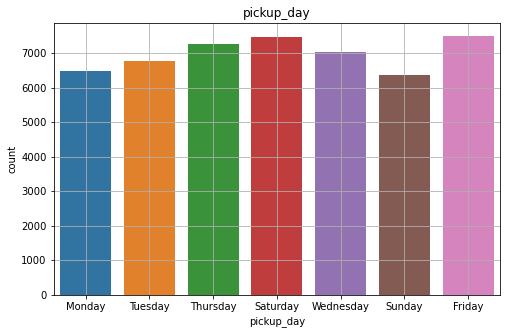

In [43]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title('pickup_day')
ax=sns.countplot(x="pickup_day",data=taxi2,ax=ax)
plt.grid()

### in above graph we can determine the that day of the week in which the taxi pickup is high

##### below i have made the line graph cause it is difficult to determine the minor diffrence in bar graph

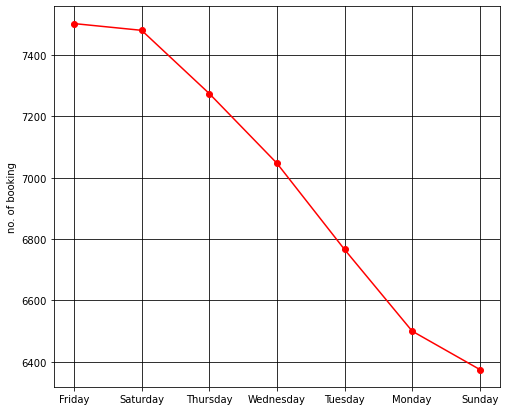

In [45]:
plt.figure(figsize=(8,7))
pick_day.plot( marker=('o'),color='red')
plt.ylabel("no. of booking")
plt.grid(color='black')

plt.show()

In [41]:
taxi2_vis=taxi2.pivot_table(index="pickup_day",columns="pickup_time_of_day",values="pickup_day_no",aggfunc='count')

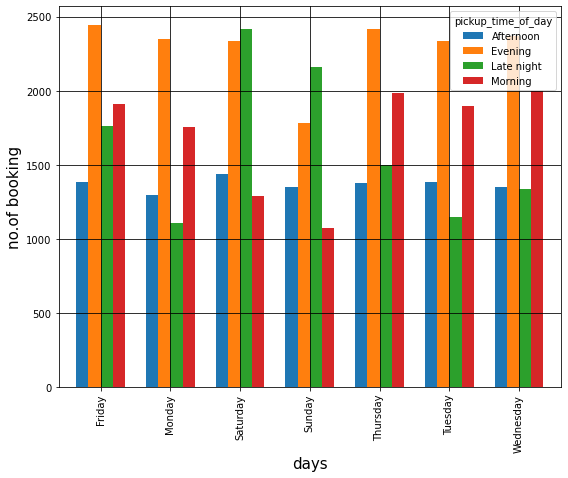

In [42]:
taxi2_vis.plot(kind="bar",figsize=(9,7),width=.7)
plt.ylabel('no.of booking',fontsize=15)
plt.xlabel('days',fontsize=15)
plt.grid(color='black')
plt.show()

### in this above graph we can observe the no.of booking in respect to the different phrases of the each day 

In [43]:
taxi1_vis=taxi1.pivot_table(index="pickup_day",columns='pickup_time_of_day',values='pickup_day_no',aggfunc='count').reset_index()

In [44]:
# x = taxi1_vis["pickup_day"]
# y1 = taxi1_vis["Afternoon"]
# y2 = taxi1_vis["Evening"]
# y3=taxi1_vis["Late night"]
# y4=taxi1_vis["Morning"]

In [45]:
# plt.figure(figsize=(20,8),)
# plt.bar(x,y4,color='orange')
# plt.bar(x, y3,bottom=y4, color='c')
# plt.bar(x, y2,bottom=y3, color='red')
# plt.bar(x,y1,bottom=y2,color='blue')
# plt.xlabel("days",fontsize=15)
# # plt.ylabel('',fontsize=15)

# # # plt.title("")
# plt.legend(["morning",'latenight','evening','noon'])
# plt.show()

In [63]:
taxi2_grp=taxi2.pivot_table(index="pickup_day",values="Distance_Travel")

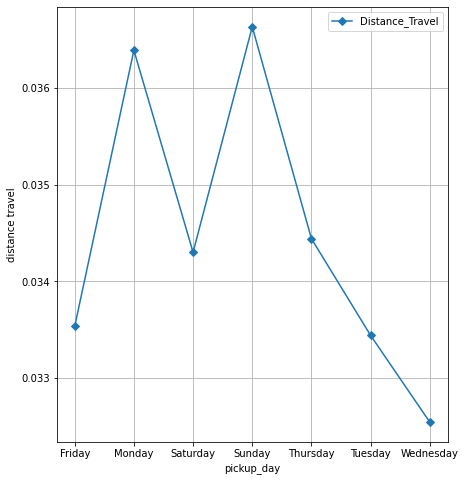

In [66]:
taxi2_grp.plot(figsize=(7,8),marker="D")
plt.ylabel("distance travel",fontsize=10)
plt.grid()
plt.show()

### from the above plot we can perceive the distance travel during different days 

In [47]:
pick_passenger=taxi2.pivot_table(index="pickup_day",values="no_of_passenger",aggfunc='count')

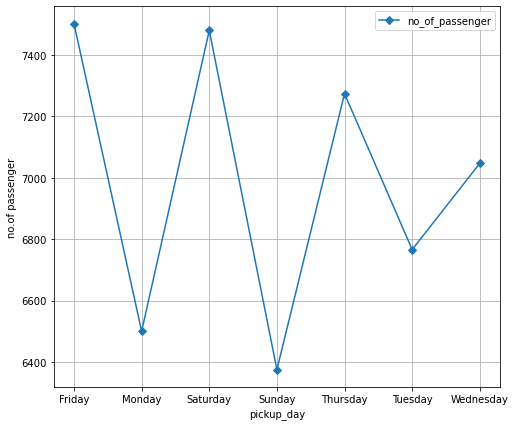

In [57]:
pick_passenger.plot(figsize=(8,7),marker='D')
plt.ylabel("no.of passenger")
plt.grid()
plt.show()

### from the above plot we can perceive the number of passengers traveled during different days 

In [49]:
time_travel=taxi2.pivot_table(index="pickup_hour",values="Distance_Travel")

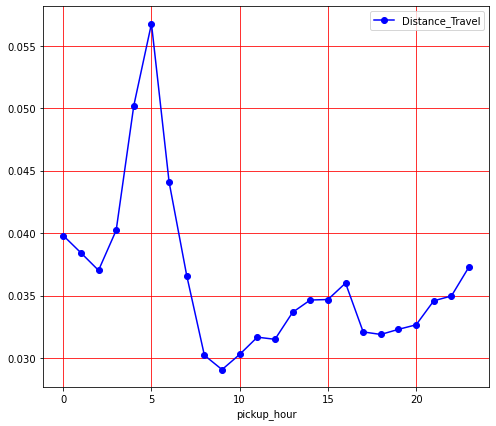

In [52]:
time_travel.plot(figsize=(8,7),color='b',marker='o')
plt.grid(color='r')
plt.show()

##### In the above graph we can determine the distance travel in respect of  24 hours (a day)

In [53]:
time_passenger=taxi2.pivot_table(index="pickup_day",columns='pickup_time_of_day',values="no_of_passenger",aggfunc='count')

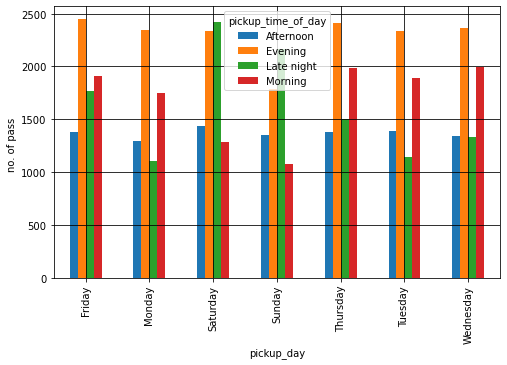

In [56]:
time_passenger.plot(kind='bar',figsize=(8,5))
plt.ylabel("no. of pass ")
plt.grid(color='black')
plt.show()

**_From the above graph i am getting the insights about no.of passengers that are travled during the different phrases of the day_**

In [59]:
time_passenger2=taxi2.pivot_table(index="pickup_day",columns='pickup_time_of_day',values="no_of_passenger",aggfunc='count')

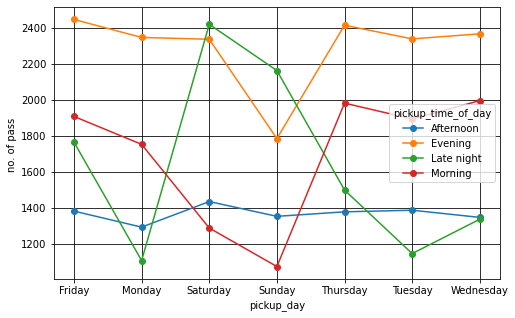

In [61]:
time_passenger.plot(figsize=(8,5),marker='o')
plt.ylabel("no. of pass ")
plt.grid(color='black')
plt.show()

In [54]:
# time_passenger_2=taxi2.pivot_table(index="pickup_day",columns='pickup_time_of_day',values="no_of_passenger",aggfunc='count').reset_index()

In [55]:
# x = time_passenger_2["pickup_day"]
# y1 = time_passenger_2["Afternoon"]
# y2 = time_passenger_2["Evening"]
# y3=time_passenger_2["Late night"]
# y4=time_passenger_2["Morning"]

In [56]:
# plt.figure(figsize=(20,8),)
# plt.bar(x,y4,color='orange')
# plt.bar(x, y3,bottom=y4, color='c')
# plt.bar(x, y2,bottom=y3, color='red')
# plt.bar(x,y1,bottom=y2,color='blue')
# plt.xlabel("days",fontsize=15)
# plt.legend(["morning",'latenight','evening','noon'])
# plt.show()

In [57]:
# plt.bar(x,y1,color='orange')
# plt.bar(x,y2,bottom=y1,color='c')
# plt.bar(x,y3,bottom=y2,color='blue')
# plt.bar(x,y4,bottom=y3,color='g')

# plt.show()


In [58]:
taxi2.info() # check the data and found out  that there are some objects present in data so i need to convert them into dummies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48944 non-null  object 
 1   amount                48944 non-null  float64
 2   no_of_passenger       48944 non-null  int64  
 3   Distance_Travel_manh  48944 non-null  float64
 4   x1                    48944 non-null  float64
 5   x2                    48944 non-null  float64
 6   y1                    48944 non-null  float64
 7   y2                    48944 non-null  float64
 8   Distance_Travel       48944 non-null  float64
 9   pickup_day            48944 non-null  object 
 10  pickup_day_no         48944 non-null  int64  
 11  pickup_hour           48944 non-null  int64  
 12  pickup_month          48944 non-null  int64  
 13  year                  48944 non-null  int64  
 14  date                  48944 non-null  object 
 15  pickup_time_of_day 

### Data modelling 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
# import the moduel for model testing

In [60]:
X=taxi2[["Distance_Travel","Distance_Travel_manh","no_of_passenger"]]
y=taxi2[["amount"]]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99) #splitting data into train and test

In [62]:
rf=RandomForestRegressor()

In [63]:
rf.fit(X_train,y_train)

<ipython-input-63-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [64]:
print("train score",rf.score(X_train,y_train))
print("test_score",rf.score(X_test,y_test))

train score 0.953908672062876
test_score 0.7540509266413029


In [65]:
help (rf)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ---------

### here i make the the dummy of the objects

In [66]:
taxi2['weekend']=np.where(taxi2['pickup_day_no'].isin([5,6]),1,0)  #

In [67]:
taxi2['morning']=np.where(taxi2["pickup_hour"].between(8,12),1,0)
taxi2['noon']=np.where(taxi2["pickup_hour"].between(12,16),1,0)
taxi2['evening']=np.where(taxi2["pickup_hour"].between(16,21),1,0)
taxi2['late_night']=np.where(taxi2["pickup_hour"].between(21,24),1,0)  

In [68]:
taxi2["is leap year"]=np.where((taxi2["year"]%4==0),1,0)

In [69]:
taxi2["q1"]=np.where(taxi2["pickup_month"].between(1,3),1,0)
taxi2['q2']=np.where(taxi2["pickup_month"].between(4,6),1,0)
taxi2['q3']=np.where(taxi2['pickup_month'].between(7,9),1,0)
taxi2["q4"]=np.where(taxi2["pickup_month"].between(10,12),1,0)


In [70]:
taxi2["begining of mnth"]=np.where(taxi2["date"].isin(range(1,10)),1,0)
taxi2["mid of month"]=np.where(taxi2["date"].isin(range(11,20)),1,0)
taxi2["end of month"]=np.where(taxi2["date"].isin(range(20,31)),1,0)



In [71]:
taxi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48944 non-null  object 
 1   amount                48944 non-null  float64
 2   no_of_passenger       48944 non-null  int64  
 3   Distance_Travel_manh  48944 non-null  float64
 4   x1                    48944 non-null  float64
 5   x2                    48944 non-null  float64
 6   y1                    48944 non-null  float64
 7   y2                    48944 non-null  float64
 8   Distance_Travel       48944 non-null  float64
 9   pickup_day            48944 non-null  object 
 10  pickup_day_no         48944 non-null  int64  
 11  pickup_hour           48944 non-null  int64  
 12  pickup_month          48944 non-null  int64  
 13  year                  48944 non-null  int64  
 14  date                  48944 non-null  object 
 15  pickup_time_of_day 

In [72]:
taxi3=taxi2.drop(columns=['unique_id',

# 'Distance_Travel',
'pickup_day',
'pickup_day_no',
'pickup_hour',
 'pickup_month',
'year',
'date',
'pickup_time_of_day',
])

#droping the the object columns  after creating dummy and saving it into taxi3

In [73]:
taxi3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48944 non-null  float64
 1   no_of_passenger       48944 non-null  int64  
 2   Distance_Travel_manh  48944 non-null  float64
 3   x1                    48944 non-null  float64
 4   x2                    48944 non-null  float64
 5   y1                    48944 non-null  float64
 6   y2                    48944 non-null  float64
 7   Distance_Travel       48944 non-null  float64
 8   weekend               48944 non-null  int32  
 9   morning               48944 non-null  int32  
 10  noon                  48944 non-null  int32  
 11  evening               48944 non-null  int32  
 12  late_night            48944 non-null  int32  
 13  is leap year          48944 non-null  int32  
 14  q1                    48944 non-null  int32  
 15  q2                 

In [74]:
import time
st=time.time()
et=time.time()
print("total time" , et-st)


total time 0.0


In [75]:
X1=taxi3.drop(columns="amount")
y1=taxi3["amount"] 
#dividing the data into X and y

In [76]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.2,random_state=99)
#spliting the data into train and test

# **_Random Forest_**

In [77]:
rf1=RandomForestRegressor()

In [78]:
rf1.fit(X1_train,y1_train)

RandomForestRegressor()

##### score of Train

In [79]:
rf1.score(X1_train,y1_train)

0.9762456780410145

##### score of test

In [80]:
rf1.score(X1_test,y1_test)

0.8052259719699485

In [81]:
# help(rf)
rf2=RandomForestRegressor(n_estimators=100,max_depth=6,
                           criterion="mse",
                           min_samples_split=2)
rf2.fit(X1_train,y1_train)



RandomForestRegressor(max_depth=6)

In [82]:
rf2.score(X1_train,y1_train)

0.8404448681653596

In [83]:
rf2.score(X1_test,y1_test)

0.7985455427901138

In [84]:
train_pred=rf2.predict(X1_train)
test_pred=rf2.predict(X1_test)

In [93]:
# help(rf)

### Hyper parameter tuning by using Gridsearch

In [86]:
st = time.time()
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[20,50,100],
           "criterion":["mse"],
           "max_depth":[5,7,9],
#             "min_samples_split":[2,3,4],
#             "min_samples_leaf":[1,4,3],
           "bootstrap":[True, False]}
rf3 = RandomForestRegressor()

rf_gs=GridSearchCV(estimator=rf3,param_grid=parameters,scoring="accuracy",
             verbose=1, n_jobs=-1,cv=10)

rf_gs.fit(X1_train,y1_train)

et = time.time()
print("total time",et-st)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


F:\conda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


total time 575.5930318832397


In [87]:
rf_gs.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'n_estimators': 20}

In [88]:
rf_gs.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=20)

In [89]:
rf4=RandomForestRegressor(n_estimators=20,max_depth=5,
                           criterion="mse",bootstrap=True)
rf4.fit(X1_train,y1_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

### Train

In [90]:
print("train",rf4.score(X1_train,y1_train))

train 0.8290255913248523


### Test

In [91]:
rf4.score(X1_test,y1_test)

0.7940778043740033

**_After performing the hyperparameter tuning  i can say that this model is working almost fine  with the accuracy of train 0.829 and test 0.794
in order to getting more accuracy i could have use Xg-boost or ada-boost but that would take  a little longer
thats why i have preferred Random forest._**